# Factoring 

### Author: Jan Nogué Gómez
#### 2nd assingment for the course in Quantum Computing 
##### Master in Quantum Science and Technology UB

The following code calculates the factors of a number $N$ for a given error $\epsilon$ and a given value of $x$. 
It calculates the value of $t$ as the following:
\begin{equation}
t = 2L + 1+\lfloor\log_2\left(2+\frac{1}{2\epsilon}\right)\rfloor
\end{equation}

In [174]:
import numpy as np
from math import ceil, gcd

def factorize(x,N,eps):
    # calculate the size of the working register
    L = ceil(np.log2(N+1))
    print(f"L = {L}")
    t = 2*L + 1 + ceil(np.log2(2 + 1/(2*eps)))
    print(f"t = {t}")

    # initialize variables
    r = None

    # create the state after modular exponentiation
    state = np.mod(np.power(x, 0), N)
    modular = [state]
    for i in range(1, 2**t):
        # update the state by modular exponentiation
        state = np.mod(np.power(x, i), N)

        # check if state is 1 and i is not 0
        if (state == 1) and (i != 0):
            r = i
            print(f"r = {r}")
            break
        else:
            modular.append(state)

    # check if factorization is successful
    if r is None:
        print(f"Algorithm couldn't factorize N = {N}")
    elif (r/2).is_integer() and np.mod(np.power(x, r//2), N) != N-1:
        _extracted_from_factorize(x, r, N)
    else:
        print(f"Algorithm couldn't factorize N = {N}")

def _extracted_from_factorize(x, r, N):
    gcd1 = gcd(int(np.power(x, r//2)-1), N)
    gcd2 = gcd(int(np.power(x, r//2)+1), N)

    factors = []
    if gcd1 != 1:
        factors.append(gcd1)
    if gcd2 != 1:
        factors.append(gcd2)

    if not factors:
        print(f"Algorithm couldn't factorize N = {N}")
    else:
        print(f"Factors {factors} were found for N = {N}")

In the following cell we obtained the factors for the example of $N=85$ and $\epsilon=1/4$ and $x=3$.

In [176]:
N=85
eps = 1/4
x=3
factorize(x,N,eps)


L = 7
t = 17
r = 16
Factors [5, 17] were found for N = 85


The general algorithm would be

In [177]:
def general_factoring(x,N,eps):   
    if N % 2 == 0:
        print(f"Factor 2 was found for N = {N}")
        return
    a = 2
    while a**2 <= N:
        b = int(np.log(N) / np.log(a))
        if a**b == N:
            print(f"Factor {a} found for N = {N}")
            return 
        a += 1
    # randomly choose x and check if gcd(x, N) > 1
    gcd_xN = gcd(x, N)
    if gcd_xN > 1:
        print(f"Factor {gcd_xN} found for N = {N}")
        return
    #otherwhise, we factorize N
    factorize(x,N,eps)
    
    

Here we add one case of the algorithm when the factors are non-trivial

In [178]:
N=86
eps = 1/4
x=3
general_factoring(x,N,eps)

Factor 2 was found for N = 86


### Study on the effect of the size t of the working register

1. With the following code we generated the plot for a fixed $x=3, N=85, \epsilon=1/4$ and we varied the size of the working register $t$.
2. We also used to generate all the plots for the coprimes of $N$.
3. We took values of $t\in[1,18]$

16


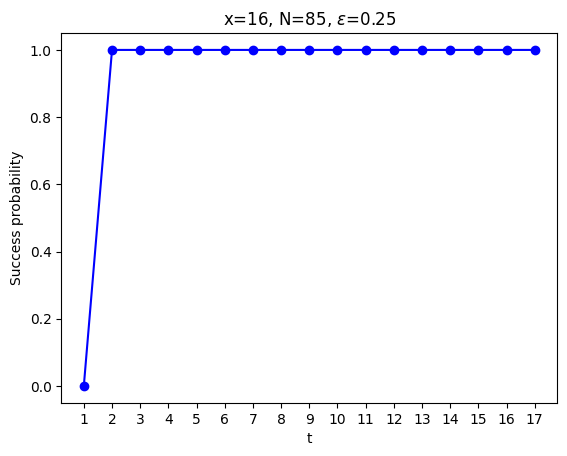

In [182]:
import numpy as np
from math import ceil, gcd
import matplotlib.pyplot as plt

def factorize(x, N, eps, t):
    L = ceil(np.log2(N+1))
    r = None
    modular = []
    for i in range(2**t):
        state = x**i % N
        if (state == 1) and (i != 0):
            r = i
            break
        else:
            modular.append(state)

    if r is not None and (r/2).is_integer() and x**(r/2) != N-1: 
        gcd1 = gcd(int(x**(r/2)-1), N)
        gcd2 = gcd(int(x**(r/2)+1), N)

        factors =[]
        if gcd1 != 1:
            factors.append(gcd1) 
            if gcd2 != 1:
                factors.append(gcd2)

        if factors != []:
            return True
        else :
            return False
    else :
        return False

x = 16 #set the value of x
N = 85
eps = 0.25
#coprimes = [x for x in range(1, N) if gcd(x, N) == 1] #uncomment this line to generate plots for all coprimes
coprimes = [x] #this line is for generating plots for a single value of x
t_values = list(range(1, 18))#range of values of t


for x in coprimes:
    success_prob = []
    print(x)
    num_trials = 100
    for t in t_values:
        num_success = sum(1 for _ in range(num_trials) if factorize(x, N, eps, t))
        success_prob.append(num_success/num_trials)

    plt.plot(t_values, success_prob, 'bo-')
    plt.xlabel('t')
    plt.ylabel('Success probability')
    plt.title(fr'x={x}, N={N}, $\epsilon$={eps}')
    plt.xticks(t_values, [str(i) for i in t_values])
    plt.savefig(f"tvalues{x}.pdf")
    plt.show()
